In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import decomposition
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (15,8)

## Загрузка датасетов

In [2]:
train_data = pd.read_csv("churn-bigml-80.csv")
test_data = pd.read_csv("churn-bigml-20.csv")
train_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Описание набора данных и решаемой задачи

In [3]:
# Общая характеристика тренировочного набора данных
print(f"Количество наблюдений: {train_data.shape[0]}")
print(f"Количество признаков: {train_data.shape[1]}")

Количество наблюдений: 2666
Количество признаков: 20


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
# Описательная статистика
train_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Решаемая задача: предсказание поведения пользователей по поводу отказа от использования услуг телекомукационной компании. Целевая переменная churn - отток абонента.

Признаки в датасете: штат, типы мобильного плана, общее количество и время звонков, количество потребленного трафика

In [6]:
pd.Series({i: train_data[i].unique() for i in train_data})

State                     [KS, OH, NJ, OK, AL, MA, MO, WV, RI, IA, MT, I...
Account length            [128, 107, 137, 84, 75, 118, 121, 147, 141, 74...
Area code                                                   [415, 408, 510]
International plan                                                [No, Yes]
Voice mail plan                                                   [Yes, No]
Number vmail messages     [25, 26, 0, 24, 37, 27, 33, 39, 41, 28, 30, 34...
Total day minutes         [265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 218...
Total day calls           [110, 123, 114, 71, 113, 98, 88, 79, 84, 127, ...
Total day charge          [45.07, 27.47, 41.38, 50.9, 28.34, 37.98, 37.0...
Total eve minutes         [197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 348....
Total eve calls           [99, 103, 110, 88, 122, 101, 108, 94, 111, 148...
Total eve charge          [16.78, 16.62, 10.3, 5.26, 12.61, 18.75, 29.62...
Total night minutes       [244.7, 254.4, 162.6, 196.9, 186.9, 203.9, 212...
Total night 

## Анализ ненужных данных и отсутствующих значений

In [7]:
train_data.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Отсутствующих значений нет

## Анализ количественных параметров датасета

Распределение каждого параметра

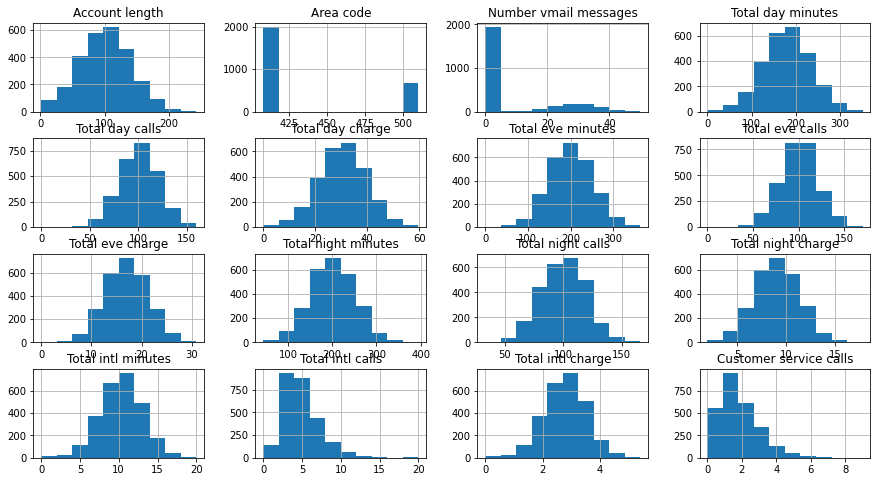

In [8]:
train_data.hist()
plt.show()

По гистограммам можно сделать вывод, что почти все признаки имеют нормальное распределение

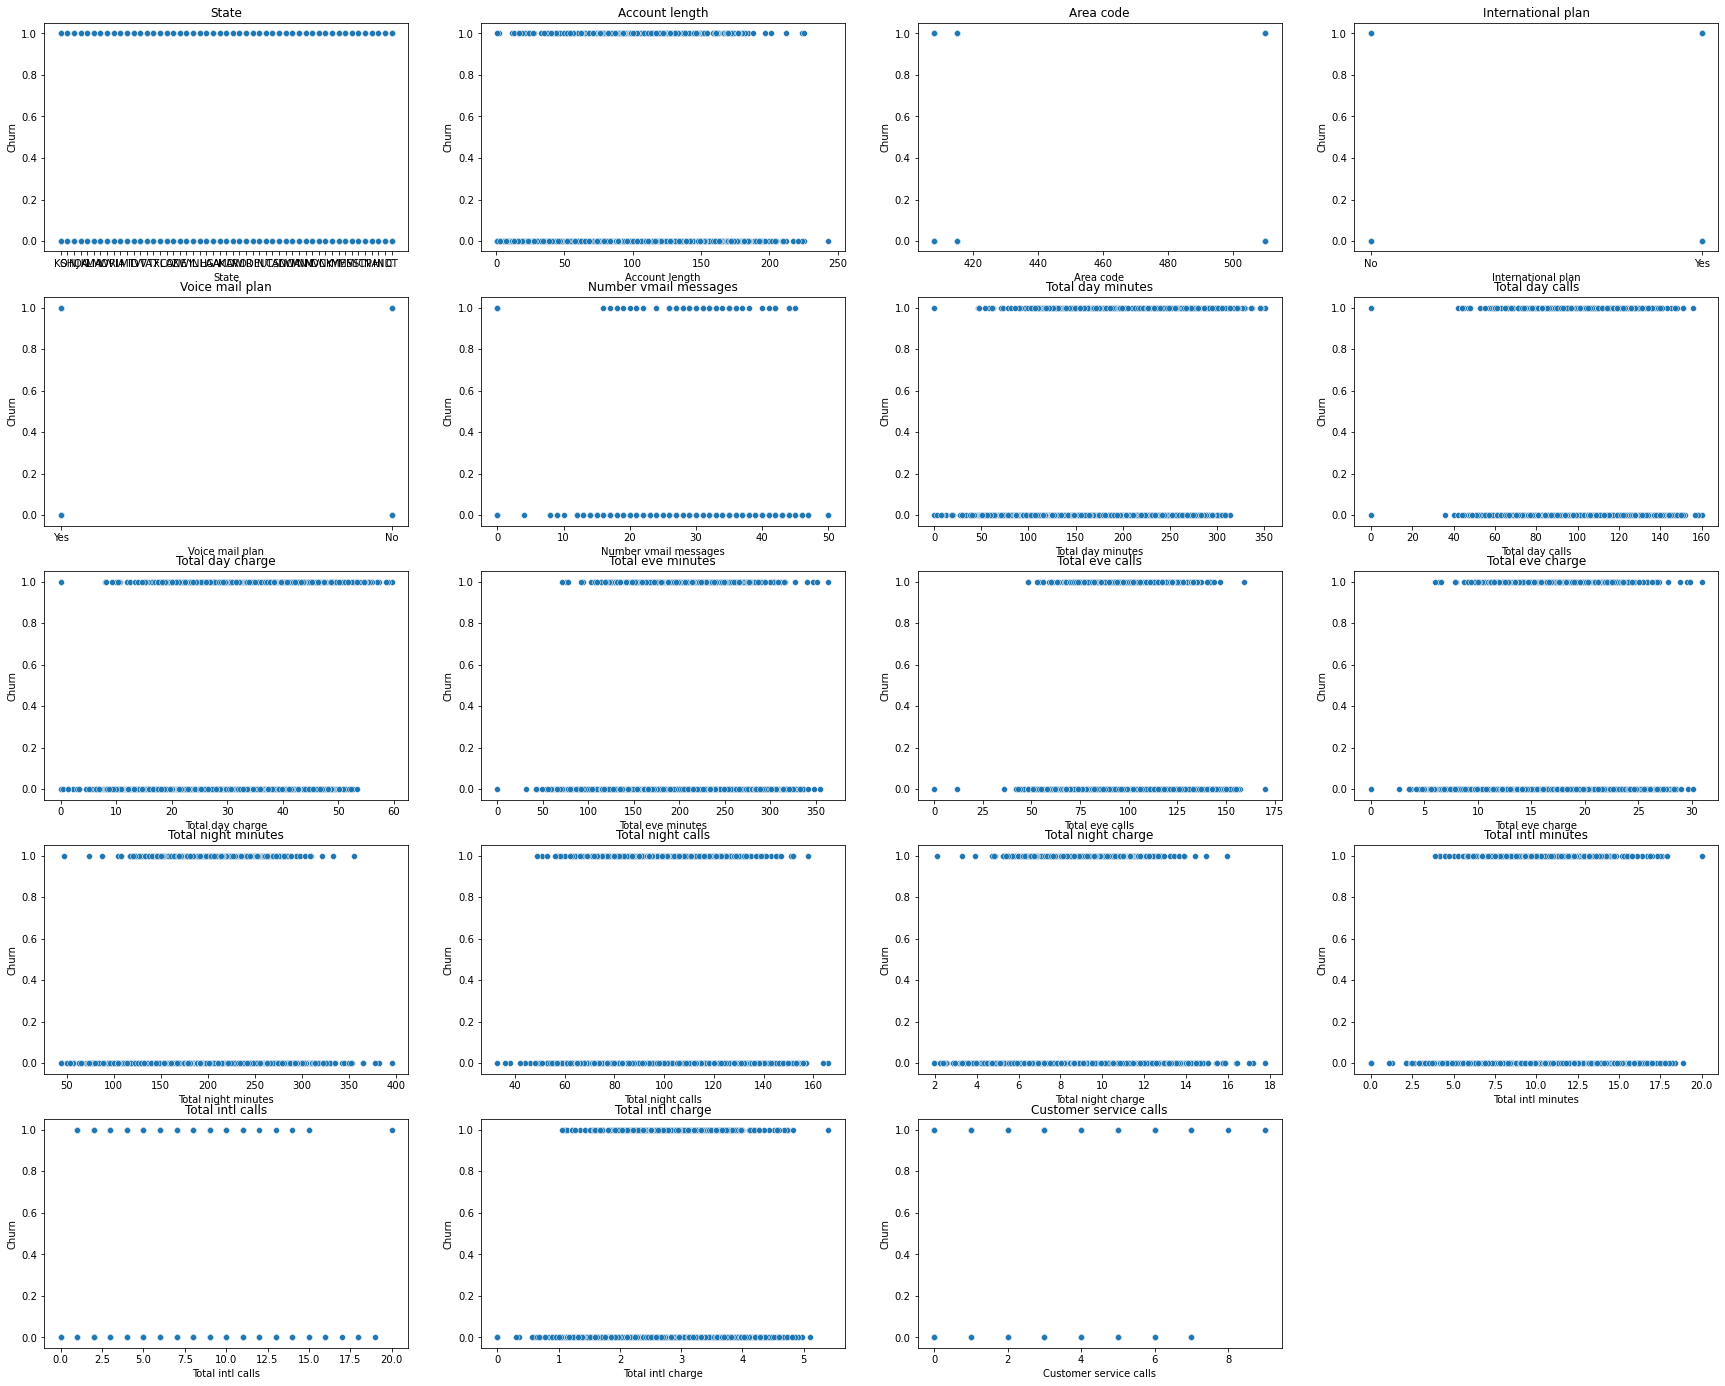

In [9]:
#построение совместного распределения каждого признака и целевой переменной
plt.rcParams['figure.figsize'] = (30,100)
for i, col in enumerate(train_data.columns.drop("Churn")):
    plt.subplot(20, 4, i+1)
    sns.scatterplot(x=col, y='Churn', data=train_data);
    plt.title(col)

Кореляционная матрица

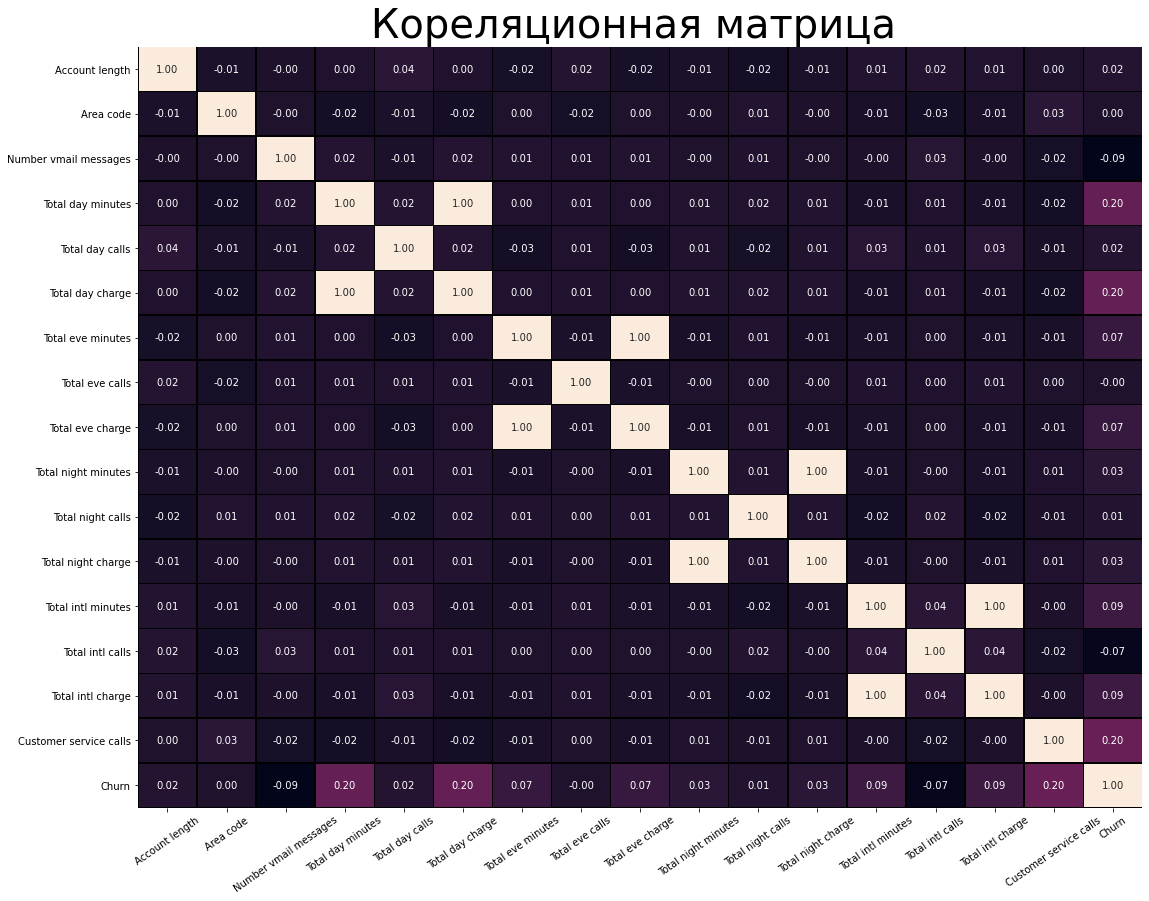

In [10]:
plt.subplots(figsize=(18,14))
sns.heatmap(train_data.corr(),annot=True,linewidths=0.4,linecolor="black",fmt="1.2f",cbar=False)
plt.title("Кореляционная матрица ",fontsize=40)
plt.xticks(rotation=35)
plt.show()

По кореляционной матрице видно, что на целевую переменную в основном влияют признаки Total day minutes, Total day charge и Customer service calls 

## Выделение целевой и факторных переменных

Целевой переменной будет Churn, а все остальные - факторные.

In [11]:
x_train = train_data.drop(columns=["Churn", "State", "International plan", "Voice mail plan"])
y_train = train_data["Churn"]
x_test = test_data.drop(columns=["Churn", "State", "International plan", "Voice mail plan"])
y_test = test_data["Churn"]

## Обучение модели

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

cls = KNeighborsClassifier()
cls.fit(x_train_scaled, y_train)
y_pred = cls.predict(x_test_scaled)

In [14]:
from sklearn import metrics

print('Метрика достоверности предсказания:')
print(metrics.accuracy_score(y_test, y_pred))
print('Метрика точности:')
print(metrics.precision_score(y_test, y_pred, average='macro'))
print('Метрика полноты')
print(metrics.recall_score(y_test, y_pred, average='macro'))

Метрика достоверности предсказания:
0.889055472263868
Метрика точности:
0.8761755485893417
Метрика полноты
0.6280824438719176


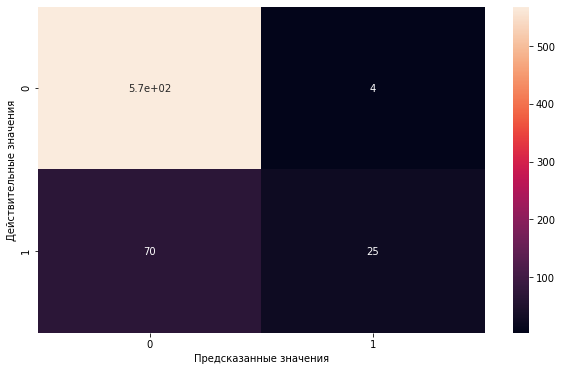

In [26]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(y_test, y_pred)),
        annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

## Использование метода обучения без учителя для улучшения модели

Понижение размерности до 90% дисперсии

In [16]:
pca = decomposition.PCA(0.90).fit(x_train_scaled)
x_train_reduced = pca.transform(x_train_scaled)
x_test_reduced = pca.transform(x_test_scaled)

## Обучение модели после понижения размерности

In [17]:
cls_reduced = KNeighborsClassifier()
cls_reduced.fit(x_train_reduced, y_train)
y_pred_reduced = cls_reduced.predict(x_test_reduced)

In [18]:
print('Метрика достоверности предсказания:')
print(metrics.accuracy_score(y_test, y_pred_reduced))
print('Метрика точности:')
print(metrics.precision_score(y_test, y_pred_reduced, average='macro'))
print('Метрика полноты')
print(metrics.recall_score(y_test, y_pred_reduced, average='macro'))

Метрика достоверности предсказания:
0.9010494752623688
Метрика точности:
0.9073010849909584
Метрика полноты
0.6657986750092013


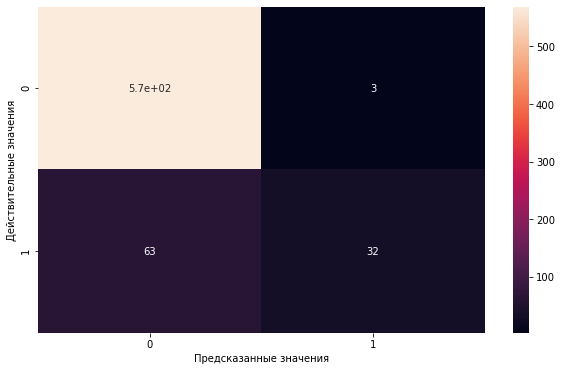

In [19]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(y_test, y_pred_reduced)),
        annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

## Кластеризация перед обучением

In [20]:
import numpy as np
from sklearn.cluster import KMeans
from typing import Tuple
def get_clusters(X_train: pd.DataFrame, X_test: pd.DataFrame, n_clusters: int) -> Tuple[pd.DataFrame, pd.DataFrame]:
    clustering = KMeans(n_clusters=n_clusters, random_state=8675309,n_jobs=-1)
    clustering.fit(X_train)
    train_labels = clustering.labels_
    X_train_clstrs = X_train.copy()
    X_train_clstrs["clusters"] = train_labels
    
    test_labels = clustering.predict(X_test)
    X_test_clstrs = X_test.copy()
    X_test_clstrs["clusters"] = test_labels
    return X_train_clstrs, X_test_clstrs

In [21]:
x_train_clust, x_test_clust = get_clusters(x_train, x_test, 12)

## Обучение модели после кластеризации

In [22]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_clust)
x_test_scaled = scaler.fit_transform(x_test_clust)

In [23]:
cls_clust = KNeighborsClassifier()
cls_clust.fit(x_train_scaled, y_train)
y_pred_clust = cls_clust.predict(x_test_scaled)

In [24]:
print('Метрика достоверности предсказания:')
print(metrics.accuracy_score(y_test, y_pred_clust))
print('Метрика точности:')
print(metrics.precision_score(y_test, y_pred_clust, average='macro'))
print('Метрика полноты')
print(metrics.recall_score(y_test, y_pred_clust, average='macro'))

Метрика достоверности предсказания:
0.8860569715142429
Метрика точности:
0.8319168173598553
Метрика полноты
0.6351122561648878


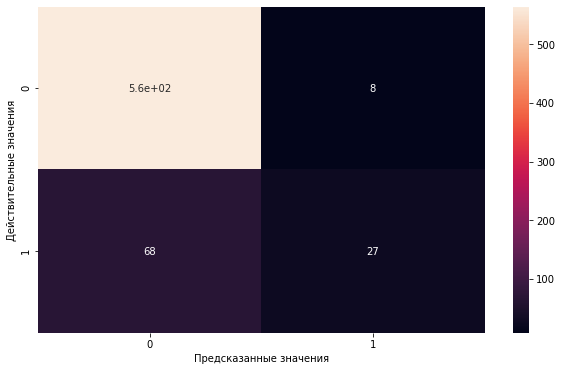

In [27]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(y_test, y_pred_clust)),
        annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

## Вывод

При использовании кластеризации модель показывает результат по полноте лучше, чем без неё. Метод понижения размерности даёт наилучшую модель из представленных по всем метрикам